## 1. Imports

In [82]:
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

## 2. Prepare dataframe

In [83]:
stock_ticker = "GME"

In [84]:
# Load data from GME
df = df = pd.read_csv(f"../../data/stock_prediction/stock_prediction_data/stock_prediction_data_{stock_ticker}.csv", index_col=[0])

In [85]:
# log_return_t+1 is to predict -> positive or negative return
target = df["log_return_shift"].apply(lambda x: 1 if x > 0 else 0)
log_return_same_day = df["log_return"].apply(lambda x: 1 if x > 0 else 0)

# used features to predict stock return
features = ["Negative", "Neutral", "Positive", "count", "pos_minus_neg","pos_minus_neg_times_count", "Volume", "pos_minus_neg_diff", "count_diff"]
df = df[features]


In [86]:
# Data normalization
df = (df - df.mean())/df.std()

## 3. PCA

In [87]:
# PCA with 3 principal components
pca = PCA(n_components=3, random_state=0)
reduced_features = pca.fit_transform(df)

In [88]:
# Create a dataframe with the values of the 3 principal components
df_pca = pd.DataFrame(reduced_features, columns=["PC1", "PC2", "PC3"])
df_pca["Label"] = target.array

In [89]:
df_pca_log_return = pd.DataFrame(reduced_features, columns=["PC1", "PC2", "PC3"])
df_pca_log_return["Label"] = log_return_same_day.array

In [92]:
# Plot the values of the 3 principal components in 3D - log_return_shift
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', title="Visualization of the 3 principal Components from PCA", height = 750,
                    color='Label')
fig.show(height = 2000, width = 1000)

In [93]:
# Plot the values of the 3 principal components in 3D - log return of same day
fig = px.scatter_3d(df_pca_log_return, x='PC1', y='PC2', z='PC3', title="Visualization of the 3 principal Components from PCA", height = 750,
                    color='Label')
fig.show(height = 2000, width = 1000)

In [35]:
# Correlation calculation for principal components and each feature
corr_dict = dict()
for col in df:
    corr_coef = list()
    for pc in df_pca.columns.to_list()[:-1]:
        r,_ = stats.pearsonr(df[col], df_pca[pc])
        corr_coef.append(r)
    corr_dict[col] = corr_coef

In [38]:
# Creating Dataframe out of the dictionary in the cell above
df_pc_corr = pd.DataFrame(corr_dict).T
df_pc_corr.rename(columns={0:"PC1",1:"PC2",2:"PC3"}, inplace = True)

In [39]:
df_pc_corr

,PC1,PC2,PC3
Negative,-0.606985,0.640617,-0.413800
Neutral,-0.524364,-0.183400,0.821299
Positive,0.870420,-0.352677,-0.312059
count,0.616583,0.694278,0.219035
pos_minus_neg,0.830291,-0.525101,0.004186
pos_minus_neg_times_count,0.825723,0.380081,0.225657
Volume,0.584816,0.668860,0.033422
pos_minus_neg_diff,0.396301,-0.529113,0.068669
count_diff,0.325931,0.344386,0.243898


In [48]:
# Show top features that correlate most with each principal component
df_pc_corr.reindex(df_pc_corr["PC1"].abs().sort_values(ascending=False).index)["PC1"]

Positive                     0.870420
pos_minus_neg                0.830291
pos_minus_neg_times_count    0.825723
count                        0.616583
Negative                    -0.606985
Volume                       0.584816
Neutral                     -0.524364
pos_minus_neg_diff           0.396301
count_diff                   0.325931
Name: PC1, dtype: float64

In [49]:
df_pc_corr.reindex(df_pc_corr["PC2"].abs().sort_values(ascending=False).index)["PC2"]

count                        0.694278
Volume                       0.668860
Negative                     0.640617
pos_minus_neg_diff          -0.529113
pos_minus_neg               -0.525101
pos_minus_neg_times_count    0.380081
Positive                    -0.352677
count_diff                   0.344386
Neutral                     -0.183400
Name: PC2, dtype: float64

In [50]:
df_pc_corr.reindex(df_pc_corr["PC3"].abs().sort_values(ascending=False).index)["PC3"]

Neutral                      0.821299
Negative                    -0.413800
Positive                    -0.312059
count_diff                   0.243898
pos_minus_neg_times_count    0.225657
count                        0.219035
pos_minus_neg_diff           0.068669
Volume                       0.033422
pos_minus_neg                0.004186
Name: PC3, dtype: float64

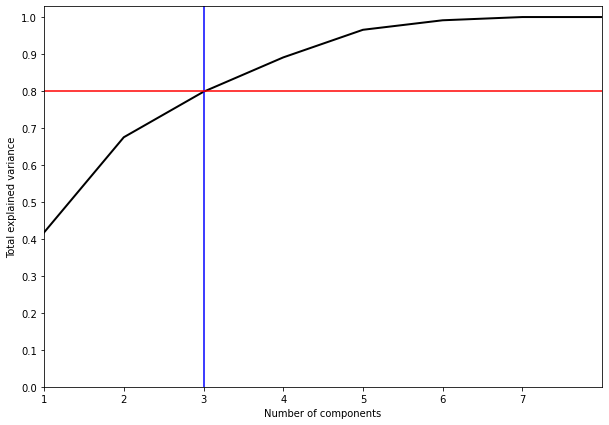

In [77]:
# PCA Explainled variance
pca = PCA().fit(df)

plt.figure(figsize=(10,7))
plt.plot(range(1, len(list(np.cumsum(pca.explained_variance_ratio_))) +1), list(np.cumsum(pca.explained_variance_ratio_)), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(1, 8)
plt.xticks(np.arange(1, 8, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(3, c='b')
plt.axhline(0.8, c='r')
plt.show();

In [68]:
test=list(np.cumsum(pca.explained_variance_ratio_))

In [45]:
# pca mit color for label and 3 dims hehehehehehe oder zwei, idk
# evaluation for best model -> plotting log return and classified item, confusion matrix with precision recall and f1

In [ ]:
# neural network worse performance because not enough data

In [75]:
test

[0.4175212355537237,
 0.6749165297809343,
 0.7979583549679263,
 0.8908345606550664,
 0.9655388683388024,
 0.9912670909236894,
 0.9999999999999998,
 0.9999999999999999,
 0.9999999999999999]